<a href="https://colab.research.google.com/github/borisbolliet/ScatteringTransformTutorials/blob/main/learning_scattering_transforms_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Wavelet Scattering Transforms

In [1]:
!pip install kymatio

## Preliminary on wavelets
  

Morlet wavelets are also called [Gabor](https://en.wikipedia.org/wiki/Dennis_Gabor) wavelets (after Dennis Gabor, the inventor of [holography](https://en.wikipedia.org/wiki/Holography)).

They are made of a carrier (a complex exponential), multiplied by an envelope (a Gaussian).

The definition is:


$$
\psi_{\lambda}(t) = \pi^{-\frac{1}{4}} e^{i \lambda t} e^{-\frac{t^2}{2}}
$$

where:

- $\psi(t)$ is the wavelet function in the time domain.

- $\pi^{-\frac{1}{4}}$ is a normalization constant.

- $ e^{i \omega_0 t}$ is the sinusoidal component (complex exponential).

- $e^{-\frac{t^2}{2}}$ is the Gaussian envelope.

- $\lambda$ is the dimensionless central frequency of the wavelet.

For the real-valued version of the Morlet wavelet, the imaginary part may simply be ignored.

In the following we shall use the notation  
$$
\lambda = 2^{k/Q}.
$$

In our case, $Q$ shall control the number of wavelets per octave (from $\omega_0$ to $2\omega_0$). Our set of wavelet filters is called the filter-bank.

We will take $Q=16$, which means that we will have wavelet filters with central frequencies:

$$
\omega_0,2^{1/16}\omega_0,2^{2/16}\omega_0,...,2\omega_0
$$

### Filter bank

In [2]:
from kymatio.scattering1d.filter_bank import scattering_filter_factory

To familiarize ourselves with wavelet filters, let us use

* T = 1024
* J = 6
* Q = 16

And build Morlet filters. For reference, see [V. Lonstalen (2017)](https://tel.archives-ouvertes.fr/tel-01559667).




In [35]:
T = 8192 # 2**13
J = 6
Q = (16,16)

phi_f, psi1_f, psi2_f = scattering_filter_factory(T, J, Q, T)

In [36]:
len(phi_f), len(psi1_f), len(psi2_f)

(4, 63, 63)

In [38]:
phi_f.keys()

dict_keys(['levels', 'xi', 'sigma', 'j'])

In [39]:
psi1_f[0]

{'levels': [array([ 0.000e+000,  5.929e-322,  1.467e-321, ..., -8.745e-322,
         -6.818e-322, -4.150e-322])],
 'xi': 0.4675543827703947,
 'sigma': 0.012162615274247493,
 'j': 0}

In [5]:
phi_f.keys()

dict_keys(['levels', 'xi', 'sigma', 'j'])

In [6]:
phi_f['xi']

0

`phi_f['levels'][0]` corresponds to the lowpass filter at resolution `T`, while
`phi_f['levels'][1]` corresponds to the filter at resolution `T/2`, and so on.

While `phi_f` only contains a single filter (at different resolutions),
the `psi1_f` and `psi2_f` outputs are lists of filters, one for each wavelet
bandpass filter in the filter bank.

The time sampling is given by

In [14]:
t = np.arange(T)/T

The filters are stored at different resolutions.

In [20]:
phi_f['levels'][0].shape,phi_f['levels'][1].shape,phi_f['levels'][2].shape,phi_f['levels'][3].shape,phi_f['levels'][4].shape,phi_f['levels'][5].shape

((8192,), (4096,), (2048,), (1024,), (512,), (256,))

In [25]:
len(psi1_f), len(psi2_f)

(63, 63)

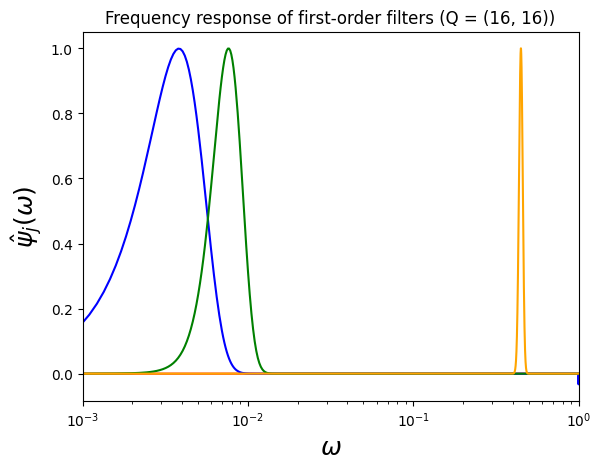

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# plt.figure()
# plt.rcParams.update({"text.usetex": True})


# for psi_f in psi1_f:
psi_f = psi1_f[62]
plt.plot(t, psi_f['levels'][0], 'b')
psi_f = psi1_f[61]
plt.plot(t, psi_f['levels'][0], 'g')

psi_f = psi1_f[1]
plt.plot(t, psi_f['levels'][0], 'orange')

plt.xlim(0.001, 1.)

plt.xlabel(r'$\omega$', fontsize=18)
plt.ylabel(r'$\hat\psi_j(\omega)$', fontsize=18)
plt.title('Frequency response of first-order filters (Q = {})'.format(Q),
          fontsize=12)
plt.xscale('log')

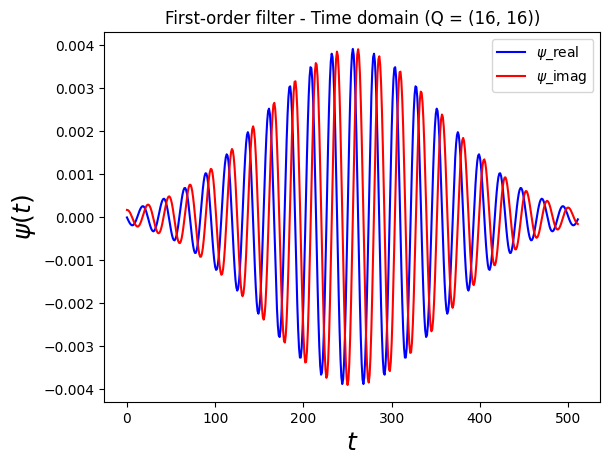

In [50]:
plt.figure()

psi_time = np.fft.ifft(psi1_f[52]['levels'][0])
psi_real = np.real(psi_time)
psi_imag = np.imag(psi_time)
plt.plot(np.concatenate((psi_real[-2**8:],psi_real[:2**8])),'b')
plt.plot(np.concatenate((psi_imag[-2**8:],psi_imag[:2**8])),'r')



plt.xlabel(r'$t$', fontsize=18)
plt.ylabel(r'$\psi(t)$', fontsize=18)
plt.title('First-order filter - Time domain (Q = {})'.format(Q), fontsize=12)
plt.legend(["$\psi$_real","$\psi$_imag"])

plt.show()

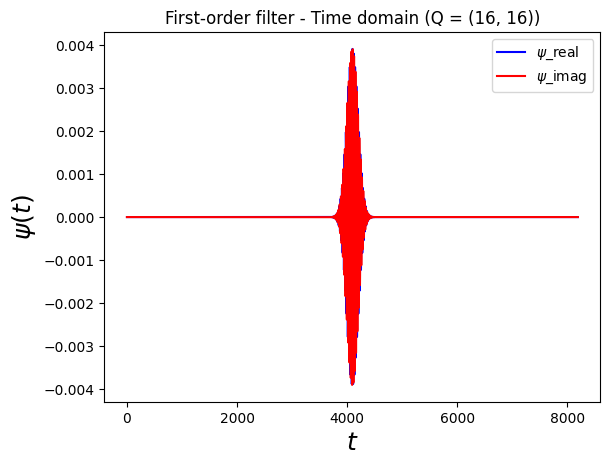

In [55]:
plt.figure()

psi_time = np.fft.ifft(psi1_f[52]['levels'][0])
psi_real = np.real(psi_time)
psi_imag = np.imag(psi_time)
plt.plot(np.concatenate((psi_real[-2**12:],psi_real[:2**12])),'b')
plt.plot(np.concatenate((psi_imag[-2**12:],psi_imag[:2**12])),'r')



plt.xlabel(r'$t$', fontsize=18)
plt.ylabel(r'$\psi(t)$', fontsize=18)
plt.title('First-order filter - Time domain (Q = {})'.format(Q), fontsize=12)
plt.legend(["$\psi$_real","$\psi$_imag"])

plt.show()

In [54]:
len(np.concatenate((psi_real[-2**12:],psi_real[:2**12])))

8192

## Audio processing



In [ ]:
!pip install scikit-cuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cupy
  Running setup.py clean for cupy
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp310-cp310-linux_x86_64.whl size=660546 sha256=839756ebd268c49d2e23

In [ ]:
import numpy as np
import os
import scipy.io.wavfile

In [ ]:
import matplotlib.pyplot as plt

### Scattering transform on spoken digit

In [ ]:

from kymatio.datasets import fetch_fsdd

Let us fetch the dataset

In [ ]:
info_dataset = fetch_fsdd(verbose=True)

Cloning git repository at  https://github.com/Jakobovski/free-spoken-digit-dataset.git


In [ ]:
file_path = os.path.join(info_dataset['path_dataset'], sorted(info_dataset['files'])[0])
_, x = scipy.io.wavfile.read(file_path)

The data file is at:

In [ ]:
file_path

'/root/kymatio_datasets/fsdd/free-spoken-digit-dataset/recordings/0_george_0.wav'

It is a recording of a person saying the word "zero"

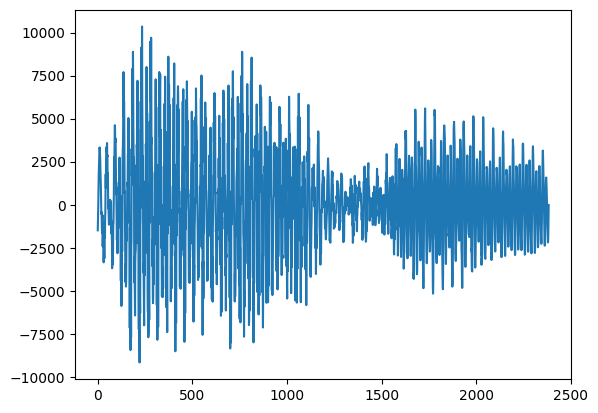

In [ ]:
# prompt: plot x

plt.plot(x)
plt.show()

In the plot above we see the time series corresponding to this signal.

Let us apply a max normalization

In [ ]:
#x = x / np.max(np.abs(x))

# or with torch
import torch

In [ ]:
x = torch.tensor(x)  # Convert to PyTorch tensor
x = x / torch.max(torch.abs(x))

The normalized signal now looks like

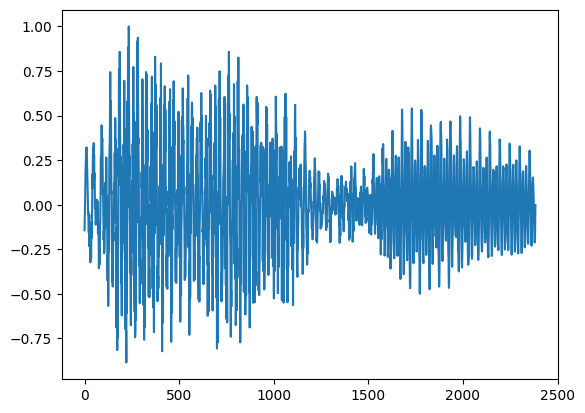

In [ ]:
plt.plot(x)
plt.show()

Let us now setup the scattering transform.

In [ ]:
from kymatio.torch import Scattering1D
# or with numpy:
# from kymatio.numpy import Scattering1D

In [ ]:
T = x.shape[-1]
J = 6
Q = 16

In [ ]:
x.shape

torch.Size([2384])

$T$ is the number of time samples of the signal, here 2384.

$J$ sets the averaging scale specified as $2^J$, so for $J=6$ the averaging scale is 64.

$Q$ controls the number of wavelets per frequency octave. Here we have 16 wavelets per octave, which corresponds to a frequency resolution of 1/16 octaves.

The object that computes the scattering transform is then constructed via

In [ ]:
scattering = Scattering1D(J, T, Q)

Let us now compute the scattering transform of the signal.

In [ ]:
Sx = scattering(x)

The result is a tensor of size $(C,\hat{T})$ where $C$ is the number of scattering coefficients.  And $\hat{T}$ is the number of time samples after averaging due to the transform (hence smaller than $T$).

The number of scattering oefficients is determined by $J$ and $Q$.

In [ ]:
Sx.shape

torch.Size([222, 37])

In this case, with $J=6$ the averaging scale is 64 and we should indeed be left with around 37 time points.

In [ ]:
2384/64

37.25

The number of wavelets per octave (i.e., $Q$) is what determines how many scattering coefficients we end up with.

This depends on the frequency content of the signal.

The metadata is stored in `scaterring.meta`

In [ ]:
meta = scattering.meta()

In [ ]:
meta['order']

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
len(meta['order']),len(meta['order'][meta['order']==0]),len(meta['order'][meta['order']==1]),len(meta['order'][meta['order']==2])

(222, 1, 63, 158)

As we see, we have 3 orders, at zeroth order we have one coefficient, at first order 63 and at second order 158 coefficients, for a total of 222 coefficients.


The transform of a 1D signal always has 3 orders. It is written as

$$
S_Jx =[S_Jx^{(0)},S_Jx^{(1)},S_Jx^{(2)}]
$$

where

$$
S_J^{(0)}x(t) = x \star \phi_J
$$

with $\star$ denoting the convolution, and $\phi_J$ a real low pass filter centered at the zero frequency.

The first order transform is given by

$$
S_J^{(1)}x(t,\lambda) = |x \star \psi^{(1)}_\lambda| \star \phi_J
$$

where $\psi^{(1)}_\lambda(t)$ is an analytic wavelet with center frequency $\lambda$. This wavelet is fixed.

At the second order we have

$$
S_J^{(2)}x(t,\lambda,\mu) = ||x \star \psi^{(1)}_\lambda|\star\psi_{\mu}^{(2)}| \star \phi_J
$$

where $\psi^{(2)}_\mu(t)$ is another analytic wavelet with center frequency $\mu$.


The reason why we don't need to go beyond second order here, there is almost no signal energy in the third order and above. (see Allys, and Bruna & Mallat)


"The outputs of the WST, called scattering coefficients, constitute an efficient, low-variance, low-dimensionality statistical description of non-Gaussian processes." (Allys et al)


"The WST coefficients depend on high-order moments of $x$, mainly of order up to $2^m$ for the $m^\text{th}$ (See Bruna & Mallat). We therefore expect the $m=2$ coefficients to allow to distinguish fields that have the same second order moments (i.e. power spectra), but different higher order moments.

However, unlike high-order moments, whose estimators exhibit variances that are increasingly dominated by outliers, that is by samples which are far away from the mean [Welling (2005)](http://www.gatsby.ucl.ac.uk/aistats/aistats2005_eproc.pdf), the WST coefficients do not involve products of values of the field. On the contrary, the WST coefficients are built using unitary and non-expansive operators (as the modulus), and have reduced variance, which means that they can be better estimated from limited a number of samples." (See Allys et al)



Examples of analytical wavelets are Morlet wavelets, and the low-pass filter is a Gaussian (see Figure 3 of [Anden & Mallat (2014)](https://arxiv.org/pdf/1304.6763)).

Let us collect the indices of the coefficients at different order.

In [ ]:
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

Let us now plot the scattering coefficients at different orders.

At zeroth order we have only one coefficient.

In [ ]:
Sx[order0]

tensor([[ 9.5771e-03,  6.0964e-03,  2.5752e-03,  6.8725e-04,  6.8717e-05,
         -6.1019e-05, -7.8642e-05, -8.0118e-05, -8.0078e-05, -7.9792e-05,
         -7.9765e-05, -8.0531e-05, -8.1711e-05, -8.2342e-05, -8.2052e-05,
         -8.1251e-05, -8.0546e-05, -8.0408e-05, -8.0878e-05, -8.1402e-05,
         -8.1556e-05, -8.1447e-05, -8.1121e-05, -8.0609e-05, -8.0002e-05,
         -7.9297e-05, -7.8812e-05, -7.8846e-05, -7.9132e-05, -7.9512e-05,
         -8.0774e-05, -9.0230e-05, -1.5579e-04, -4.6500e-04, -1.4009e-03,
         -3.1289e-03, -4.8133e-03]])

Text(0.5, 1.0, 'Zeroth-order scattering')

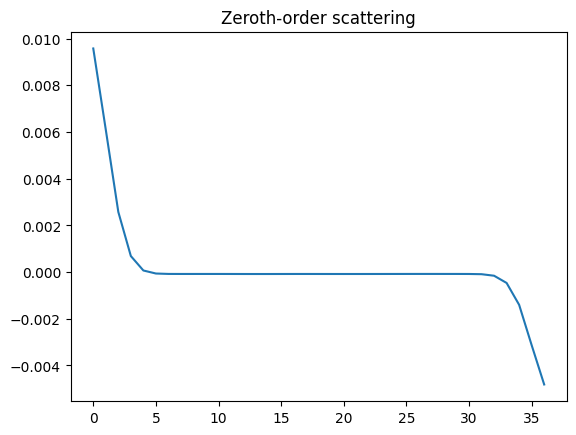

In [ ]:
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')

This shows how the zeroth order coefficient evolves in the time domain.

We can do the same for first order coefficient.

In [ ]:
Sx[order1].shape

torch.Size([63, 37])

Text(0.5, 1.0, 'First-order scattering')

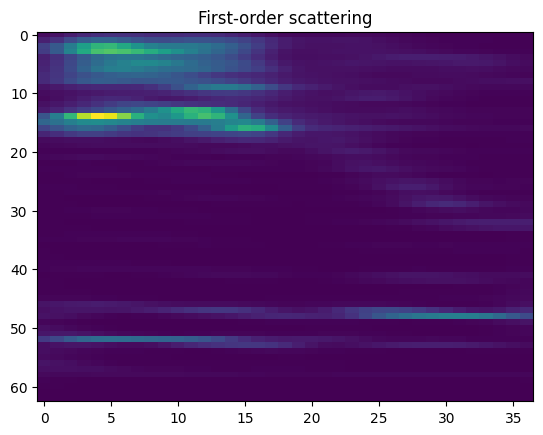

In [ ]:
plt.imshow(Sx[order1].numpy(), aspect='auto')
plt.title('First-order scattering')

Here we can interpret the $y$-axis as the frequency (or log frequency) and $x$-axis is time (dowsampled through the averaging scale).

In 1D (time):

Text(0.5, 0, 'downsampled time values')

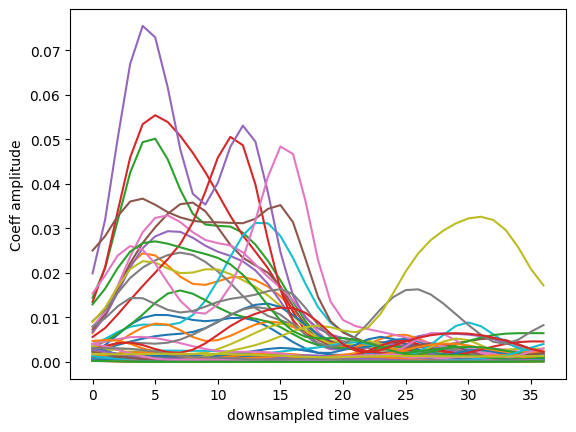

In [ ]:
import pandas as pd
df = pd.DataFrame(Sx[order1].numpy().T)

df.plot(legend=False)
plt.ylabel("Coeff amplitude")
plt.xlabel("downsampled time values")

Finally, let us look at the second order coefficients

Text(0.5, 1.0, 'Second-order scattering')

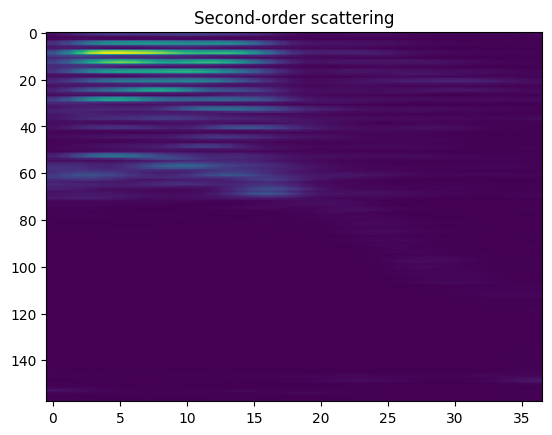

In [ ]:
plt.imshow(Sx[order2].numpy(), aspect='auto')
plt.title('Second-order scattering')

Text(0.5, 0, 'downsampled time values')

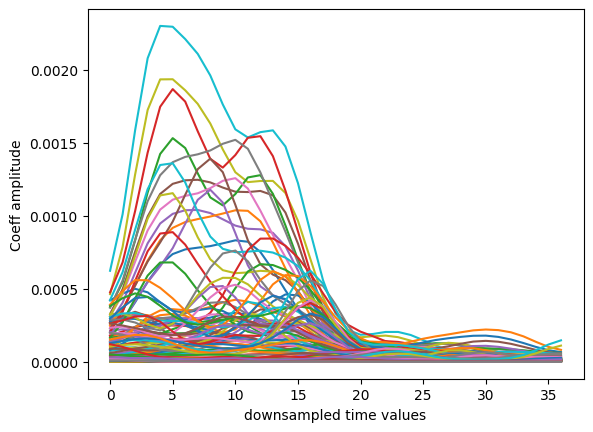

In [ ]:
import pandas as pd
df = pd.DataFrame(Sx[order2].numpy().T)

df.plot(legend=False)
plt.ylabel("Coeff amplitude")
plt.xlabel("downsampled time values")

### Classification of spoken digits


Here, we learn how useful scattering representations can be for classification of spoken digits.

In [ ]:
from torch.nn import Linear, NLLLoss, LogSoftmax, Sequential
from torch.optim import Adam

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
use_cuda

True

In [ ]:
torch.manual_seed(42)

Here we set-up our scattering transform pipeline differently.

We use $T=2^{13}$

In [ ]:
T=2**13
T

8192

We also set $J=8$ for our averaging scale and Q=12 for number of wavelets per octave.

In [ ]:
J = 8
Q = 12

In [ ]:
T/2**J

32.0

This will give us 32 downsampled time points.

Also, we set a small number to avoid singular errors in logs.

In [ ]:
log_eps=1e-16

In [ ]:
path_dataset= info_dataset['path_dataset']

In [ ]:
files=info_dataset['files']

Let us instantiate some tensor to hold the signals.

In [ ]:
x_all = torch.zeros(len(files), T, dtype=torch.float32, device=device)
y_all = torch.zeros(len(files), dtype=torch.int64, device=device)
subset = torch.zeros(len(files), dtype=torch.int64, device=device)

We now create a test and train set.

In [ ]:
for k, f in enumerate(files):
    basename = f.split('.')[0]

    # Get label (0-9) of recording.
    y = int(basename.split('_')[0])

    # Index larger than 5 gets assigned to training set.
    if int(basename.split('_')[2]) >= 5:
        subset[k] = 0
    else:
        subset[k] = 1

    # Load the audio signal and normalize it.
    _, x = scipy.io.wavfile.read(os.path.join(path_dataset, f))
    x = np.asarray(x, dtype='float')
    x /= np.max(np.abs(x))

    # Convert from NumPy array to PyTorch Tensor.
    x = torch.from_numpy(x).to(device)

    # If it's too long, truncate it.
    if x.numel() > T:
        x = x[:T]

    # If it's too short, zero-pad it.
    start = (T - x.numel()) // 2

    x_all[k,start:start + x.numel()] = x
    y_all[k] = y

Thus, `subset=0` corresponds to our training set (all files with indices larger than 4) and the first 4 files in each basename are for testing and have `subset=1`

In [ ]:
scattering = Scattering1D(J, T, Q).to(device) # the to device is important for GPU compatibility

Let us transform the whole dataset.

This dataset has a batch size of 3000. There are 3000 signals to transform.

In [ ]:
x_all.shape

torch.Size([3000, 8192])

In [ ]:
Sx_all = scattering(x_all) # can also use  scattering.forward(x_all)

In [ ]:
Sx_all.shape

torch.Size([3000, 337, 32])

Our batch is now over 32 time points and each transform has a hierarchy of 3337 coefficients (i.e., waevelets).

We remove the zeroth order coefficients as they dont carry useful information.

In [ ]:
Sx_all = Sx_all[:,1:,:]

Let us take log as a normalizing step.

In [ ]:
Sx_all = torch.log(torch.abs(Sx_all) + log_eps)

In [ ]:
Sx_all.shape

torch.Size([3000, 336, 32])

And average along the time dimension to get a time-shift invariant representation.

In [ ]:
Sx_all = torch.mean(Sx_all, dim=-1)

In [ ]:
Sx_all.shape

torch.Size([3000, 336])

We now have 336 numbers per signal in our batch to chartacterize each (instead of 8192!).

We move on and train a logistic regression classifier. The output of this classifier (based on the logistic function, i.e., sigmoid) is a probablity for belonging to a class.

Extract the training data:

In [ ]:
Sx_train, y_train = Sx_all[subset == 0], y_all[subset == 0]

In [ ]:
y_train, y_train.shape

(tensor([1, 6, 4,  ..., 7, 4, 2], device='cuda:0'), torch.Size([2700]))

Remenber, our labels in `y_train` are just the number being spoken.

Standardized the data, to mean zero and unit variance:

In [ ]:
mu_train = Sx_train.mean(dim=0)
std_train = Sx_train.std(dim=0)
Sx_train = (Sx_train - mu_train) / std_train

In [ ]:
num_input = Sx_train.shape[-1]
num_classes = y_train.cpu().unique().numel()
model = Sequential(Linear(num_input, num_classes), LogSoftmax(dim=1))
optimizer = Adam(model.parameters())
criterion = NLLLoss()

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
# Number of signals to use in each gradient descent step (batch).
batch_size = 32
# Number of epochs.
num_epochs = 50
# Learning rate for Adam.
lr = 1e-4

In [ ]:
nsamples = Sx_train.shape[0]
nbatches = nsamples // batch_size

In [ ]:
nbatches,nsamples

(84, 2700)

In [ ]:
for e in range(num_epochs):
    # Randomly permute the data. If necessary, transfer the permutation to the
    # GPU.
    perm = torch.randperm(nsamples, device=device)

    # For each batch, calculate the gradient with respect to the loss and take
    # one step.
    for i in range(nbatches):
        idx = perm[i * batch_size : (i+1) * batch_size]
        model.zero_grad()
        resp = model.forward(Sx_train[idx])
        loss = criterion(resp, y_train[idx])
        loss.backward()
        optimizer.step()

    # Calculate the response of the training data at the end of this epoch and
    # the average loss.
    resp = model.forward(Sx_train)
    avg_loss = criterion(resp, y_train)

    # Try predicting the classes of the signals in the training set and compute
    # the accuracy.
    y_hat = resp.argmax(dim=1)
    accuracy = (y_train == y_hat).float().mean()

    print('Epoch {}, average loss = {:1.3f}, accuracy = {:1.3f}'.format(
        e, avg_loss, accuracy))

Epoch 0, average loss = 1.336, accuracy = 0.638
Epoch 1, average loss = 1.067, accuracy = 0.729
Epoch 2, average loss = 0.915, accuracy = 0.770
Epoch 3, average loss = 0.809, accuracy = 0.812
Epoch 4, average loss = 0.736, accuracy = 0.827
Epoch 5, average loss = 0.694, accuracy = 0.828
Epoch 6, average loss = 0.646, accuracy = 0.839
Epoch 7, average loss = 0.597, accuracy = 0.845
Epoch 8, average loss = 0.568, accuracy = 0.850
Epoch 9, average loss = 0.540, accuracy = 0.861
Epoch 10, average loss = 0.516, accuracy = 0.868
Epoch 11, average loss = 0.503, accuracy = 0.874
Epoch 12, average loss = 0.486, accuracy = 0.871
Epoch 13, average loss = 0.497, accuracy = 0.857
Epoch 14, average loss = 0.456, accuracy = 0.880
Epoch 15, average loss = 0.436, accuracy = 0.886
Epoch 16, average loss = 0.438, accuracy = 0.882
Epoch 17, average loss = 0.422, accuracy = 0.889
Epoch 18, average loss = 0.421, accuracy = 0.881
Epoch 19, average loss = 0.411, accuracy = 0.891
Epoch 20, average loss = 0.399

Let us now test our network.

Collect testing set:

In [ ]:
Sx_test, y_test = Sx_all[subset == 1], y_all[subset == 1]

Standardize it:

In [ ]:
Sx_test = (Sx_test - mu_train) / std_train

Calculate the response of the classifier model:

In [ ]:
response = model.forward(Sx_test)
avg_loss = criterion(response, y_test)

# Try predicting the labels of the signals in the test data and compute the
# accuracy.

y_hat = response.argmax(dim=1)
accuracy = (y_test == y_hat).float().mean()

print('TEST, average loss = {:1.3f}, accuracy = {:1.3f}'.format(
      avg_loss, accuracy))

TEST, average loss = 0.282, accuracy = 0.890


Show the confusion matrix

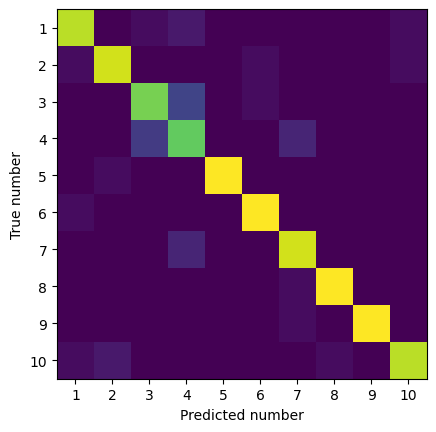

In [ ]:
predicted_categories = y_hat.cpu().numpy()
actual_categories = y_test.cpu().numpy()

confusion = confusion_matrix(actual_categories, predicted_categories)
plt.figure()
plt.imshow(confusion)
tick_locs = np.arange(10)
ticks = ['{}'.format(i) for i in range(1, 11)]
plt.xticks(tick_locs, ticks)
plt.yticks(tick_locs, ticks)
plt.ylabel("True number")
plt.xlabel("Predicted number")
plt.show()